In [1]:
import torch
from torchvision import datasets,transforms,models
import numpy as np
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [4]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
 
transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
 
training_dataset = datasets.ImageFolder('./data/ants_and_bees/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('./data/ants_and_bees/val', transform=transform)
 
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=False)

In [5]:
print(len(training_dataset))
print(len(validation_dataset))

244
153


In [6]:
training_dataset

Dataset ImageFolder
    Number of datapoints: 244
    Root location: ./data/ants_and_bees/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               RandomAffine(degrees=(0, 0), scale=(0.8, 1.2), shear=(-10, 10))
               ColorJitter(brightness=[0, 2], contrast=[0, 2], saturation=[0, 2], hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [8]:
classes = ('ant','bee')

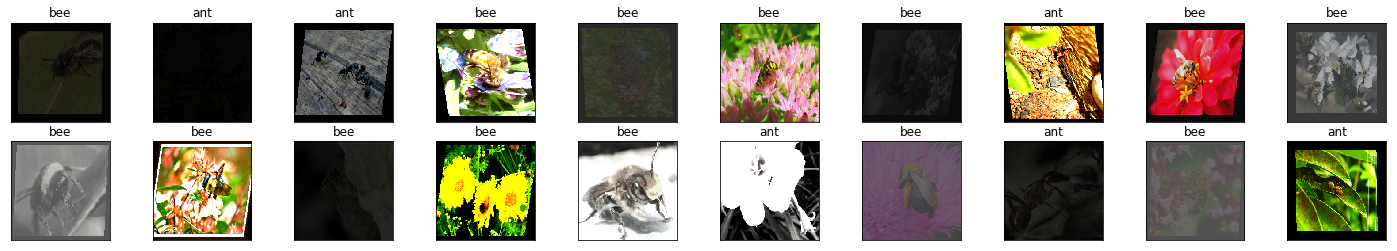

In [9]:
dataiter = iter(training_loader)
images, labels = dataiter.next()   # grab the  batch
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

# Load the Imagenext model

In [10]:
#model = models.alexnet(pretrained=True)

In [47]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\VitoDH/.cache\torch\checkpoints\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [02:15<00:00, 4.08MB/s]


In [48]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Freeze the parameters in feature extraction part (convolutional)

In [49]:
for param in model.features.parameters():
    param.requires_grad = False

In [50]:
import torch.nn as nn
 
n_inputs = model.classifier[6].in_features   # change the last layer
last_layer = nn.Linear(n_inputs, len(classes))  # add a new layer to replace the last layer
model.classifier[6] = last_layer   
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [51]:
model = model.to(device)

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [53]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for epoch in range(epochs):
    
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    
    for inputs,labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        
        outputs = model(inputs).to(device)
        loss = criterion(outputs,labels).to(device)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,preds = torch.max(outputs,1)   #maxscores and index
        
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data).item()
    
    with torch.no_grad():
        for val_inputs,val_labels in validation_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
        
            
            val_outputs = model(val_inputs).cuda()
            val_loss = criterion(val_outputs,val_labels).cuda()
            
            _,val_preds = torch.max(val_outputs,1)   #maxscores and index
        
            val_running_loss += val_loss.item()
            val_running_corrects += torch.sum(val_preds == val_labels.data).item()
    
    epoch_loss = running_loss / len(training_loader.dataset)  # change due to the batch size change
    epoch_acc = running_corrects / len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss / len(validation_loader)
    val_epoch_acc = val_running_corrects / len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    
    print('Epoch : ', (epoch + 1))
    print('training loss: {:.4f},accuracy: {:.4f}'.format(epoch_loss,epoch_acc))
    print('validation loss: {:.4f},validation accuracy: {:.4f}'.format(val_epoch_loss,val_epoch_acc))

Epoch :  1
training loss: 0.0259,accuracy: 0.7295
validation loss: 0.2433,validation accuracy: 0.8954
Epoch :  2
training loss: 0.0149,accuracy: 0.8525
validation loss: 0.2908,validation accuracy: 0.9150
Epoch :  3
training loss: 0.0168,accuracy: 0.8238
validation loss: 0.2290,validation accuracy: 0.9477
Epoch :  4
training loss: 0.0127,accuracy: 0.8975
validation loss: 0.2816,validation accuracy: 0.9412
Epoch :  5
training loss: 0.0106,accuracy: 0.9262
validation loss: 0.3749,validation accuracy: 0.9150


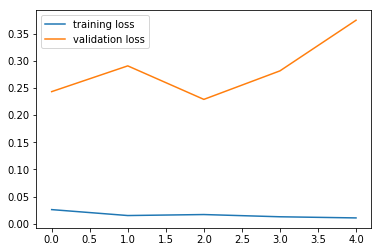

In [54]:
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_history,label='validation loss')
plt.legend()

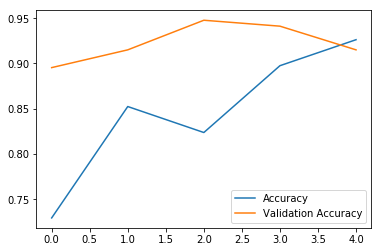

In [55]:
plt.plot(running_corrects_history,label='Accuracy')
plt.plot(val_running_corrects_history,label='Validation Accuracy')
plt.legend()

## Test

<Response [200]>


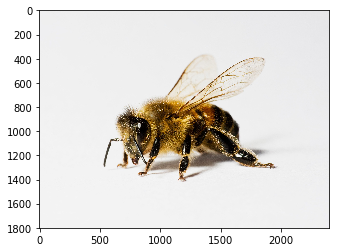

In [56]:
import requests
from PIL import Image
url = 'https://media.wired.com/photos/5bb532b7f8a2e62d0bd5c4e3/125:94/w_2393,h_1800,c_limit/bee-146810332.jpg'
response = requests.get(url,stream= True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

## Preprocessing the image

In [57]:
import PIL

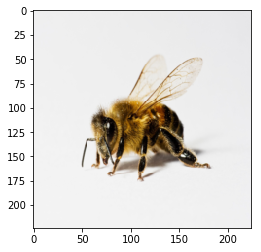

In [58]:

img = transform(img)    # resize the image
plt.imshow(im_convert(img))

In [59]:
img.shape

torch.Size([3, 224, 224])

In [60]:
img = img.to(device)
img = img.unsqueeze(0)
output = model(img).to(device)

            
_,pred = torch.max(output,1)   #maxscores and index
print(classes[pred.item()])

bee


In [61]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

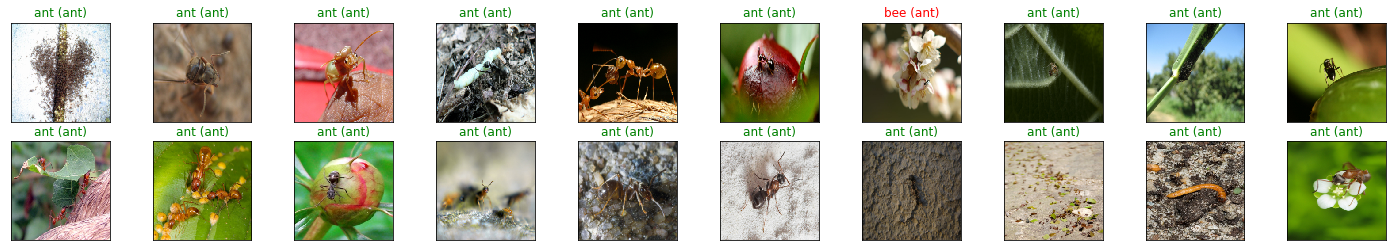

In [62]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()   # grab the  batch
images = images.to(device)
labels = labels.to(device)
output = model(images)
_,preds = torch.max(output,1)   #maxscores and index

fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color = ("green" if preds[idx] == labels[idx] else "red"))